# Stock and Crypto Currency Correlation analysis
#### Be advised this is an intersting project that I did to expand my knowledge on different currencies. It is not in any way financial advice to be acted on. I recommend that you also do your own research before investing.

In [17]:
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt


#Start of time frame from 4 years ago up until today
start = dt(2018,1,1)
now = dt.now()
#Stock tickers
#If you want to use this project you can add your own stock tickers, just make sure they exist in the time frame
tickers = ["FB", "NVDA", "MSFT", "TSLA", "GM", "F", "SILVER-USD", "ADBE", "GOOGL", "XOM", "XLE"]
colnames = []

for ticker in tickers:
    data = pdr.get_data_yahoo(ticker, start, now)
    if len(colnames) == 0:
        #Take the closest adjusted price and copy it
        combined = data[['Adj Close']].copy()
    else:
        combined = combined.join(data['Adj Close'])
    #Append to the colnames to know which stock we already added
    colnames.append(ticker)
    combined.columns = colnames
    
print(combined)

                    FB        NVDA        MSFT        TSLA         GM  \
Date                                                                    
2018-01-02  181.419998   49.380802   81.530228   64.106003  38.072208   
2018-01-03  184.669998   52.630745   81.909676   63.450001  39.001240   
2018-01-04  184.330002   52.908176   82.630585   62.924000  40.203518   
2018-01-05  186.850006   53.356533   83.655067   63.316002  40.085114   
2018-01-08  188.279999   54.991417   83.740410   67.281998  40.276390   
...                ...         ...         ...         ...        ...   
2022-02-18  206.160004  236.419998  287.929993  856.979980  48.599998   
2022-02-22  202.080002  233.899994  287.720001  821.530029  46.770000   
2022-02-23  198.449997  223.869995  280.269989  764.039978  46.380001   
2022-02-24  207.600006  237.479996  294.589996  800.770020  46.349998   
2022-02-25  210.479996  241.570007  297.309998  809.869995  47.430000   

                    F  SILVER-USD        ADBE     

We get the results above from the **Yahoo Finacne API**.
We can see the Dates and the price of the stocks in the Ticker list we created.


Lets try to visualize the results without setting the scale to logarithmic.

<function matplotlib.pyplot.show(close=None, block=None)>

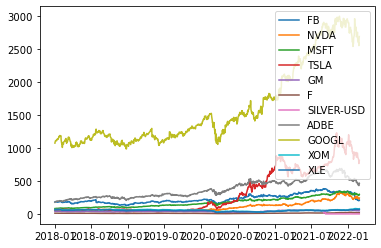

In [18]:
for ticker in tickers:
    plt.plot(combined[ticker], label=ticker)
    
plt.legend(loc="upper right")
plt.show

Problem is that some stocks have a much higher price than others and the default scale makes it difficult to spot the changes.
We don't see an analysis of the movement in the above graph but just a visualization of price changes through time.
Before changing the scale, let's analyze the changes in percentage.

In [19]:
corr_data = combined.pct_change()
print(corr_data)

                  FB      NVDA      MSFT      TSLA        GM         F  \
Date                                                                     
2018-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2018-01-03  0.017914  0.065814  0.004654 -0.010233  0.024402  0.007899   
2018-01-04 -0.001841  0.005271  0.008801 -0.008290  0.030827  0.017241   
2018-01-05  0.013671  0.008474  0.012398  0.006230 -0.002945  0.016949   
2018-01-08  0.007653  0.030641  0.001020  0.062638  0.004772 -0.003788   
...              ...       ...       ...       ...       ...       ...   
2022-02-18 -0.007462 -0.035296 -0.009631 -0.022103 -0.004506  0.028506   
2022-02-22 -0.019790 -0.010659 -0.000729 -0.041366 -0.037654 -0.041574   
2022-02-23 -0.017963 -0.042882 -0.025893 -0.069979 -0.008339 -0.019665   
2022-02-24  0.046107  0.060794  0.051094  0.048073 -0.000647  0.011799   
2022-02-25  0.013873  0.017223  0.009233  0.011364  0.023301  0.039650   

            SILVER-USD      ADBE     

Now we can set the scale to "Logarithmic" for a better visualization. 

<function matplotlib.pyplot.show(close=None, block=None)>

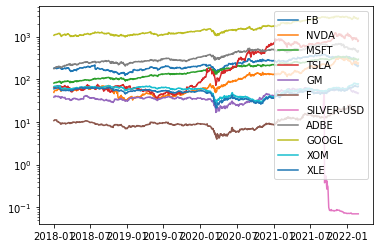

In [20]:
plt.yscale("log")
for ticker in tickers:
    plt.plot(combined[ticker], label=ticker)
    
plt.legend(loc="upper right")
plt.show

Let's see the fluctating changes in percentages again.

Before we get into analysing the whole data set. Let's see an intersting case of the data being used.

In [21]:
start = dt(2018,1,1)
now = dt.now()
#Stock tickers
#If you want to use this project you can add your own stock tickers, just make sure they exist in the time frame
chips = ["GOLD", "BAC", "KO", "AXP", "FB"]
colnames_chip = []

for chip in chips:
    data_chip = pdr.get_data_yahoo(chip, start, now)
    if len(colnames_chip) == 0:
        #Take the closest adjusted price and copy it
        combined_chip = data_chip[['Adj Close']].copy()
    else:
        combined_chip = combined_chip.join(data_chip['Adj Close'])
    #Append to the colnames to know which stock we already added
    colnames_chip.append(chip)
    combined_chip.columns = colnames_chip
    
print(combined_chip)

                 GOLD        BAC         KO         AXP          FB
Date                                                               
2018-01-02  14.055790  27.429279  39.993099   93.103203  181.419998
2018-01-03  13.870847  27.337543  39.905277   93.677231  184.669998
2018-01-04  13.898587  27.695316  40.467327   95.235374  184.330002
2018-01-05  13.824611  27.823744  40.458534   95.452576  186.850006
2018-01-08  13.630417  27.631100  40.397068   94.574333  188.279999
...               ...        ...        ...         ...         ...
2022-02-18  23.037338  45.959999  62.540001  194.880005  206.160004
2022-02-22  22.659025  45.560001  62.279999  192.440002  202.080002
2022-02-23  22.728714  44.779999  61.590000  188.949997  198.449997
2022-02-24  22.440001  43.599998  60.509998  188.350006  207.600006
2022-02-25  22.559999  45.020000  62.849998  193.710007  210.479996

[1046 rows x 5 columns]


In [22]:
chip_data = combined_chip.pct_change().corr(method="pearson")
print(chip_data)

          GOLD       BAC        KO       AXP        FB
GOLD  1.000000 -0.007020  0.122791  0.063088  0.130613
BAC  -0.007020  1.000000  0.524292  0.798809  0.344045
KO    0.122791  0.524292  1.000000  0.568144  0.261597
AXP   0.063088  0.798809  0.568144  1.000000  0.343147
FB    0.130613  0.344045  0.261597  0.343147  1.000000


<AxesSubplot:>

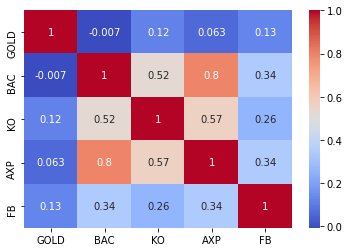

In [23]:
sns.heatmap(chip_data, annot=True, cmap="coolwarm")

Now let's figure out the correlation.
###### Guidelines:
____
1. The warmer it gets the more correlation we have, the colder it gets the less correlation exists.
2. If the number becomes negative, it means the stocks have opposite correlation.

We can see the heat area, that I like to call the "Hot Square". The Stocks Bank of America, and American Express are closely correlated with a correlation point of 0.8
We can aslo see a how a relitively nuetral stock like Facebook correlates in the diagram above.
Gold on the other hand, has a negative correlation with BA(Bank of America), which means in the time line of approximately 4 years, Gold and BA have been acting opposite to some extent.

###### Now we go back to our big analysis of stock correlation

In [24]:
corr_data = combined.pct_change().corr(method="pearson")
print(corr_data)

                  FB      NVDA      MSFT      TSLA        GM         F  \
FB          1.000000  0.545036  0.623081  0.320401  0.325541  0.292698   
NVDA        0.545036  1.000000  0.698269  0.433522  0.365530  0.320630   
MSFT        0.623081  0.698269  1.000000  0.437767  0.384861  0.326938   
TSLA        0.320401  0.433522  0.437767  1.000000  0.294512  0.270616   
GM          0.325541  0.365530  0.384861  0.294512  1.000000  0.745207   
F           0.292698  0.320630  0.326938  0.270616  0.745207  1.000000   
SILVER-USD  0.046705  0.017833  0.027892  0.093329 -0.003460  0.070041   
ADBE        0.609422  0.677194  0.827042  0.433484  0.302102  0.233653   
GOOGL       0.660938  0.635360  0.793948  0.368533  0.422435  0.339990   
XOM         0.279697  0.304396  0.365422  0.203971  0.563984  0.523533   
XLE         0.318941  0.353411  0.420424  0.264354  0.625574  0.567565   

            SILVER-USD      ADBE     GOOGL       XOM       XLE  
FB            0.046705  0.609422  0.660938  0.

Now I'm going to plot a heat map using the correlation data above using seaborn. This graph will be used to figure put any existing correlation between he stocks.

<AxesSubplot:>

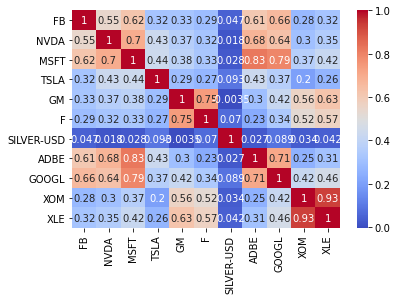

In [25]:
sns.heatmap(corr_data, annot=True, cmap="coolwarm")



Well firstly the stocks have correlation with themselves(Diagonal red "1" squares) -> if stock a rises then stock b rises.
A non-correlation wuld be 0 and a negative (-1) correlation means opposite correlation.
For example Apple  and Microsoft are highly correlated. 
Microsoft and Nvidia are highly correlated
Then Facebook and Microsoft to some degree are correlacted
And so on...

Great now lets see the correlatin between crypto currencies that Yahoo Finance offers.

In [26]:
start = dt(2018,1,1)
now = dt.now()
#Stock tickers
#If you want to use this project you can add your own stock tickers, just make sure they exist in the time frame
crypto = ["BTC", "ETH-USD", "DAG", "XRP-USD", "DOGE-USD", "SHIB-USD", "BCH-USD"]
colnames_c = []

for currency in crypto:
    data_c = pdr.get_data_yahoo(currency, start, now)
    if len(colnames_c) == 0:
        #Take the closest adjusted price and copy it
        combined_c = data_c[['Adj Close']].copy()
    else:
        combined_c = combined_c.join(data_c['Adj Close'])
    #Append to the colnames to know which stock we already added
    colnames_c.append(currency)
    combined_c.columns = colnames_c
    
print(combined_c)

                   BTC      ETH-USD   DAG   XRP-USD  DOGE-USD  SHIB-USD  \
Date                                                                      
2020-10-01  100.000000   353.205902  2.00  0.238249  0.002616  0.000000   
2020-10-02  100.000000   346.238922  2.00  0.234117  0.002583  0.000000   
2020-10-05   99.995003   353.956787  2.00  0.250816  0.002612  0.000000   
2020-10-06  100.029999   340.815857  2.00  0.245341  0.002611  0.000000   
2020-10-07   99.919998   341.808655  2.00  0.248539  0.002595  0.000000   
...                ...          ...   ...       ...       ...       ...   
2022-02-17   96.567200  2881.481934  3.55  0.767173  0.138552  0.000028   
2022-02-18   96.642303  2785.727539  3.50  0.785890  0.138768  0.000028   
2022-02-22   96.523903  2639.299316  3.65  0.722833  0.131553  0.000025   
2022-02-23   96.390404  2590.359619  3.75  0.698746  0.127846  0.000025   
2022-02-24   96.481598  2598.067139  3.90  0.696272  0.123813  0.000024   

               BCH-USD  

 Visualize the results for crypto currencies now

<function matplotlib.pyplot.show(close=None, block=None)>

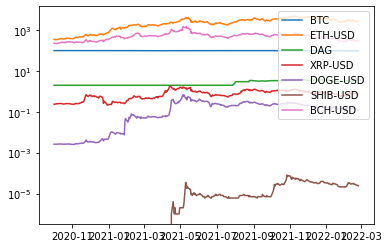

In [27]:
plt.yscale("log")
for currency in crypto:
    plt.plot(combined_c[currency], label=currency)
    
plt.legend(loc="upper right")
plt.show

In [28]:
corrcrypto_data = combined_c.pct_change().corr(method="pearson")
print(corrcrypto_data)

               BTC   ETH-USD       DAG   XRP-USD  DOGE-USD  SHIB-USD   BCH-USD
BTC       1.000000 -0.006408  0.053892 -0.014905  0.043405 -0.019169  0.011284
ETH-USD  -0.006408  1.000000  0.078131  0.485930  0.306590  0.174041  0.696309
DAG       0.053892  0.078131  1.000000  0.028792  0.003787  0.001809  0.041089
XRP-USD  -0.014905  0.485930  0.028792  1.000000  0.190795 -0.084143  0.539302
DOGE-USD  0.043405  0.306590  0.003787  0.190795  1.000000 -0.144021  0.323794
SHIB-USD -0.019169  0.174041  0.001809 -0.084143 -0.144021  1.000000  0.005832
BCH-USD   0.011284  0.696309  0.041089  0.539302  0.323794  0.005832  1.000000


<AxesSubplot:>

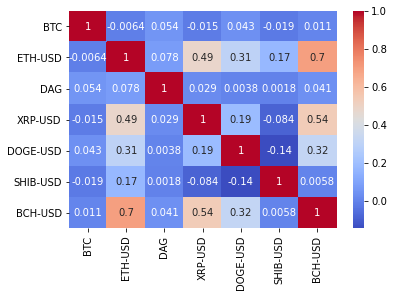

In [29]:
sns.heatmap(corrcrypto_data, annot=True, cmap="coolwarm")

The results are truly interesting. ETH and BTC have almost no correlation; but ETH and BCH are very much in correlation(0.7)
There is a 0.5 correlation with BCH and XRP and a less amount of correlation between HBAR(Which is considered an stable coin) and ETH
Other coins appear to have almost no correlation or very little like DOGE and XRP.

#### Now the question I always wanted to know the answer too, is there any correlation between major stocks and crypto currencies?

Lets find out

In [30]:
start = dt(2018,1,1)
now = dt.now()
#Stock tickers
#If you want to use this project you can add your own stock tickers, just make sure they exist in the time frame
stockyptos = ["BTC", "XOM", "F", "XLE"]
colnames_cs = []

for stockypto in stockyptos:
    data_cs = pdr.get_data_yahoo(stockypto, start, now)
    if len(colnames_cs) == 0:
        #Take the closest adjusted price and copy it
        combined_cs = data_cs[['Adj Close']].copy()
    else:
        combined_cs = combined_cs.join(data_cs['Adj Close'])
    #Append to the colnames to know which stock we already added
    colnames_cs.append(currency)
    combined_cs.columns = colnames_cs
    
print(combined_cs)

               BCH-USD    BCH-USD    BCH-USD    BCH-USD
Date                                                   
2020-10-01  100.000000  30.141401   6.681828  27.368174
2020-10-02  100.000000  30.004932   6.820415  27.632143
2020-10-05   99.995003  30.696377   6.949102  28.461765
2020-10-06  100.029999  30.377945   6.909506  28.037527
2020-10-07   99.919998  30.478024   7.156981  28.433483
...                ...        ...        ...        ...
2022-02-17   96.567200  78.230003  17.540001  68.470001
2022-02-18   96.642303  77.360001  18.040001  68.050003
2022-02-22   96.523903  76.459999  17.290001  66.949997
2022-02-23   96.390404  76.769997  16.950001  67.639999
2022-02-24   96.481598  75.800003  17.150000  67.110001

[353 rows x 4 columns]


In [31]:
cs_data = combined_cs.pct_change().corr(method="pearson")
print(cs_data)

          BCH-USD   BCH-USD   BCH-USD   BCH-USD
BCH-USD  1.000000 -0.162272 -0.104783 -0.158246
BCH-USD -0.162272  1.000000  0.388555  0.951503
BCH-USD -0.104783  0.388555  1.000000  0.420445
BCH-USD -0.158246  0.951503  0.420445  1.000000


<AxesSubplot:>

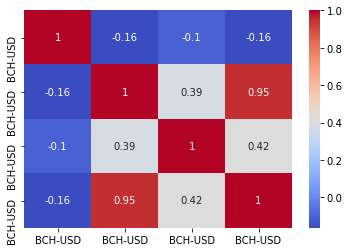

In [32]:
sns.heatmap(cs_data, annot=True, cmap="coolwarm")


Since stocks and Crypto Currencies are not in the same cluster in Yahoo finance the results shows up as BCH-USD all around.
However I have deciphered this and here are the results:  
**BTC has negative correlation with both TD and MS stock, and the correlation ratio is bigger then the negative numbers we saw with just stocks.**
So it appears at least in the case of BitCoin it is better to be mindful of this relation. 
In case of other crypto currencies this ratio could be less negative since ETH for example has it's own functionalities and value cluster.
